In [5]:
# For Data Manipulation
import numpy as np
import pandas as pd
import pickle

# For Data Manipulation
import matplotlib.pyplot as plt
import seaborn as sns

# For ML Model
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import RobustScaler , PolynomialFeatures , LabelEncoder
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# For ML ALGO
from sklearn.linear_model import LogisticRegression

In [6]:
iris = pd.read_csv(r"C:\Users\iaman\ML\INTERNSHIP TASK\Datasets\Iris.csv")

iris.shape

(150, 6)

In [7]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris['Species'] = iris['Species'].str.replace('Iris-', '', regex=False)

In [9]:
iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
5,6,5.4,3.9,1.7,0.4,setosa
95,96,5.7,3.0,4.2,1.2,versicolor
71,72,6.1,2.8,4.0,1.3,versicolor
26,27,5.0,3.4,1.6,0.4,setosa
13,14,4.3,3.0,1.1,0.1,setosa


In [10]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
features = ['SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' , 'PetalWidthCm']

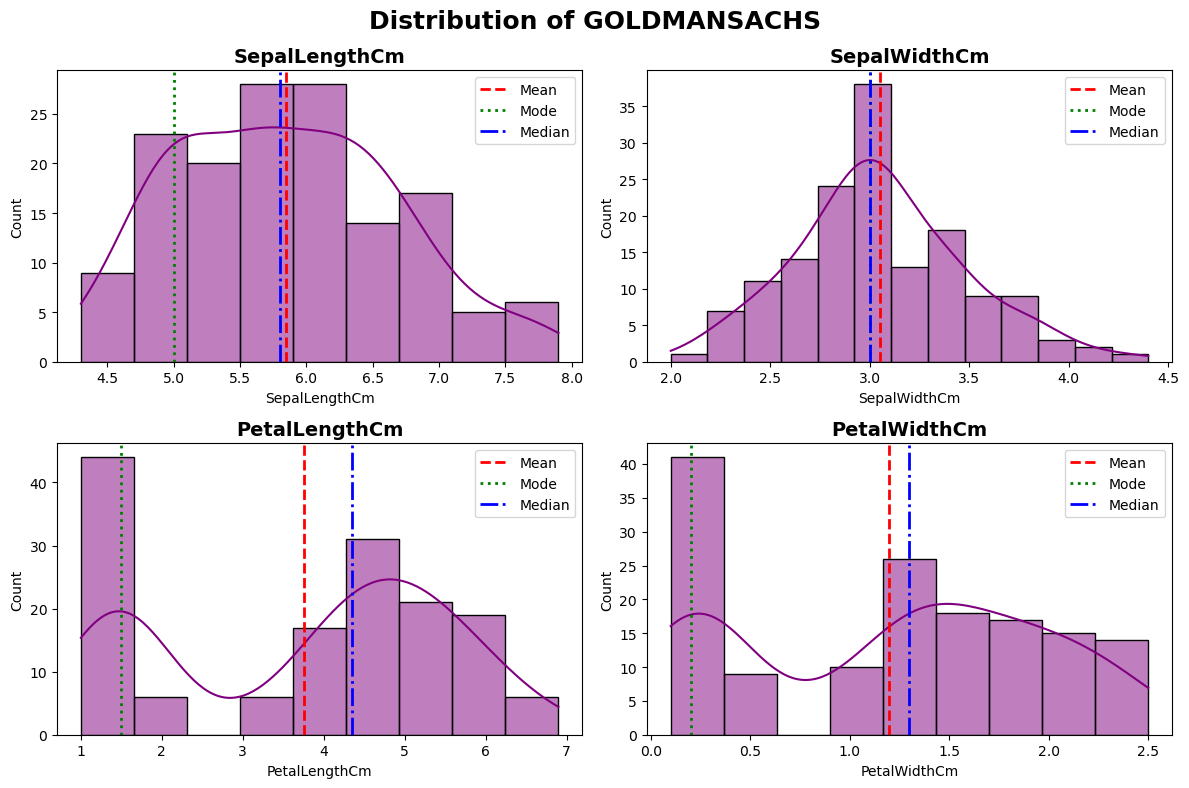

In [13]:
fig , ax = plt.subplots( 2 , 2 , figsize = (12 , 8) )
ax = ax.flatten()

for i , feature in enumerate(features):

    mean = iris[feature].mean()
    median = iris[feature].median()
    mode = iris[feature].mode()[0]
    std = iris[feature].std()
    
    sns.histplot(iris[feature], kde=True, ax=ax[i] , color = 'purple')
    ax[i].axvline( mean , color = 'red' , linestyle = 'dashed' , linewidth = 2 , label = 'Mean' )
    ax[i].axvline( mode , color = 'green' , linestyle = 'dotted' , linewidth = 2 , label = 'Mode' )
    ax[i].axvline( median , color = 'blue' , linestyle = 'dashdot' , linewidth = 2 , label = 'Median' )
    ax[i].set_title(f'{feature}' , fontsize = 14 , fontweight = 'bold')
    ax[i].legend()

plt.suptitle('Distribution of GOLDMANSACHS' , fontsize = 18 , fontweight = 'bold')
plt.tight_layout()
plt.show()

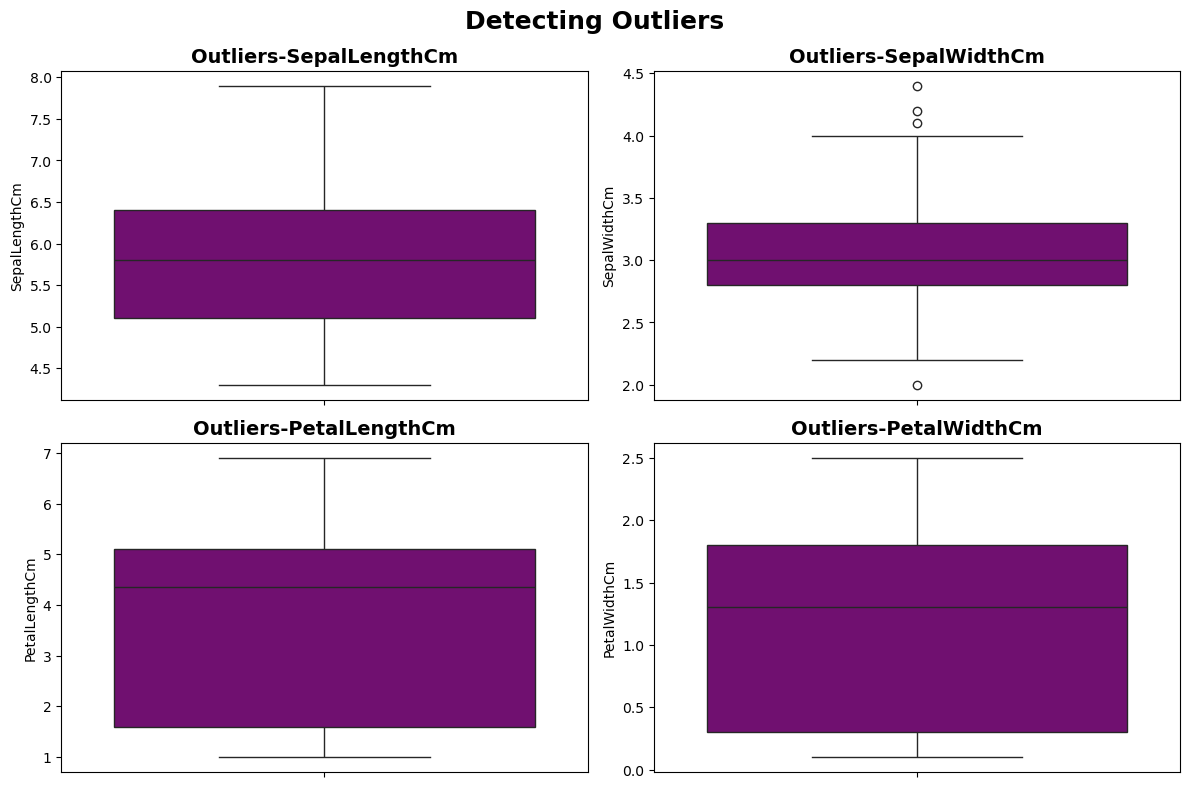

In [14]:
fig , ax = plt.subplots( 2 , 2 , figsize = (12 , 8) )
ax = ax.flatten()

for i , feature in enumerate(features):
    
    sns.boxplot(iris[feature], ax=ax[i] , color = 'purple')
    ax[i].set_title(f'Outliers-{feature}' , fontsize = 14 , fontweight = 'bold')


plt.suptitle('Detecting Outliers' , fontsize = 18 , fontweight = 'bold')
plt.tight_layout()
plt.show()

In [15]:
le = LabelEncoder()

X = iris.iloc[:,1:5].values
y = le.fit_transform(iris.iloc[:,-1])

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', RobustScaler(), [0, 1, 2, 3]) 
    ],
    remainder='passthrough'
)

In [17]:
clf = LogisticRegression()

model = Pipeline([
    ('preprocessor' , preprocessor),
    ('polynomial' , PolynomialFeatures( degree = 3 , include_bias = False )),
    ('classifier' , clf)
])

param_grid = [
    {
        'classifier__solver': ['lbfgs'],
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__class_weight': [None, 'balanced'],
        'classifier__max_iter': [2000, 5000]
    }
]

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...egression())])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'classifier__C': [0.01, 0.1, ...], 'classifier__class_weight': [None, 'balanced'], 'classifier__max_iter': [2000, 5000], 'classifier__solver': ['lbfgs']}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the compu

In [18]:
print(grid.best_params_)
print(grid.best_score_)

{'classifier__C': 1, 'classifier__class_weight': None, 'classifier__max_iter': 2000, 'classifier__solver': 'lbfgs'}
0.9333333333333333


In [21]:
clf = LogisticRegression(
    C=1,
    solver='lbfgs',
    max_iter=2000
)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('polynomial', PolynomialFeatures(degree=3, include_bias=False)),
    ('classifier', clf)
])

model.fit(X_train, y_train)

with open("iris_model.pkl", "wb") as file:
    pickle.dump(model, file)

In [20]:
y_pred = model.predict(X_test)

print(f'Classification Report \n{classification_report(y_test,y_pred)}')

Classification Report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

